# TEST pycoQC package
** This notebook contains tests for all functions contained in pycoQC package **

In [1]:
# Jupyter specific imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Pyplot/matplotlib imports
import pylab as pl

# Import pycoQC main class
from pycoQC import pycoQC
from pycoQC import help, print
from pycoQC import sequencing_summary_file

In [2]:
# Pylab settings
%pylab inline
pl.rcParams['figure.figsize'] = 20, 7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('seaborn-white')

Populating the interactive namespace from numpy and matplotlib


## pycoQC __init__

In [3]:
help(pycoQC.__init__, full=True)

Parse Albacore sequencing_summary.txt file and clean-up the data

* seq_summary_file

Path to the sequencing_summary.txt generated by Albacore

* runid

If you want a specific runid to be analysed. By default it will analyse all the read in the file irrespective of their runid

[Default None]

* filter_zero_len

If True, zero length reads will be filtered out. [Default False]

* verbose

print additional informations. [Default False]

In [4]:
p = pycoQC(sequencing_summary_file)

In [5]:
p = pycoQC(sequencing_summary_file, runid="7082b6727942b3939a023beaf03ef24cec1722e5", verbose=True)

In [6]:
p = pycoQC(sequencing_summary_file, verbose=True, filter_zero_len=True)

In [29]:
# test for 1D^2 data type
p = pycoQC('./data/example_1dsq_summary.txt', verbose=True)

## overview

In [30]:
help(pycoQC.overview, full=True)

Generate a quick overview of the data (tables + plots)

In [31]:
p.overview()

KeyError: 'num_events_template'

## reads_len_bins

In [9]:
help(pycoQC.reads_len_bins, full=True)

Count the number of reads per interval of sequence length and return a dataframe

* bins

Limits of the intervals as a list

[Default [-1,0,25,50,100,500,1000,5000,10000,100000,10000000]]

In [10]:
p.reads_len_bins()

,Count
Sequence lenght ranges,
"(-1, 0]",0
"(0, 25]",185
"(25, 50]",177
"(50, 100]",401
"(100, 500]",5639
"(500, 1000]",12222
"(1000, 5000]",63464
"(5000, 10000]",12010
"(10000, 100000]",33498


In [11]:
p.reads_len_bins(bins=[0,50,100,500,1000,10000,1000000])

,Count
Sequence lenght ranges,
"(0, 50]",362
"(50, 100]",401
"(100, 500]",5639
"(500, 1000]",12222
"(1000, 10000]",75474
"(10000, 1000000]",33498


## reads_qual_bins

In [12]:
help(pycoQC.reads_qual_bins, full=True)

Count the number of reads per interval of sequence quality and return a dataframe

* bins

Limits of the intervals as a list

[Default [-1,0,2,4,6,8,10,12,14,16,18,20,40]]

In [13]:
p.reads_qual_bins()

,Count
Sequence quality ranges,
"(-1, 0]",0
"(0, 2]",0
"(2, 4]",42
"(4, 6]",888
"(6, 8]",13520
"(8, 10]",22032
"(10, 12]",39009
"(12, 14]",50354
"(14, 16]",1751


In [14]:
p.reads_qual_bins([0,2,4,6,8,10,12,14,16,40])

,Count
Sequence quality ranges,
"(0, 2]",0
"(2, 4]",42
"(4, 6]",888
"(6, 8]",13520
"(8, 10]",22032
"(10, 12]",39009
"(12, 14]",50354
"(14, 16]",1751
"(16, 40]",0


## channels_activity

In [15]:
help(pycoQC.channels_activity, full=True)

Plot the activity of channels at read, base or event level. The layout does not represent the physical layout of the flowcell

* level

Aggregate channel output results by "reads", "bases" or "events". [Default "reads"]

* figsize

Size of ploting area [Default [24,12]]

* cmap

Matplotlib colormap code to color the space [Default "OrRd"]

* alpha

Opacity of the area from 0 to 1 [Default 1]

* robust

if True the colormap range is computed with robust quantiles instead of the extreme values [Default True]

* annot

If True, write the data value in each cell. [Default True]

* fmt

String formatting code to use when adding annotations (see matplotlib documentation) [Default "d"]

* cbar

Whether to draw a colorbar scale on the right of the graph [Default False]

=> Return

A matplotlib.axes object for further user customisation (http://matplotlib.org/api/axes_api.html)

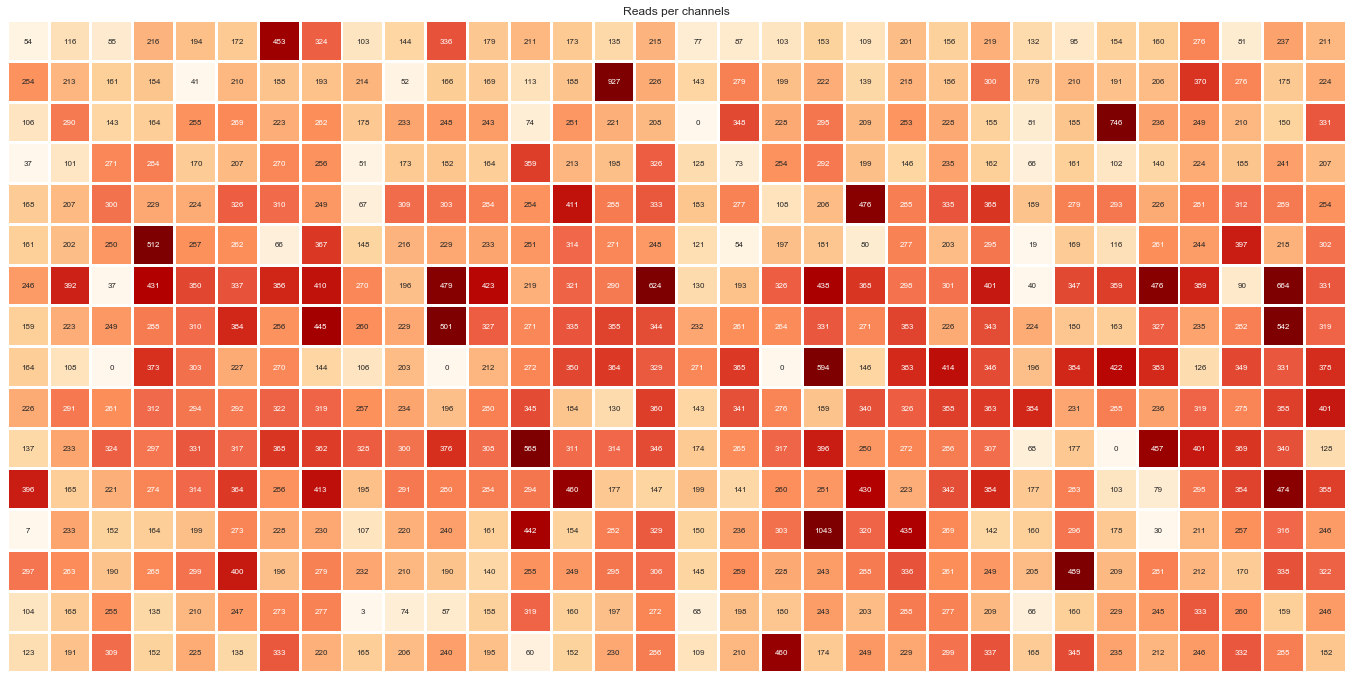

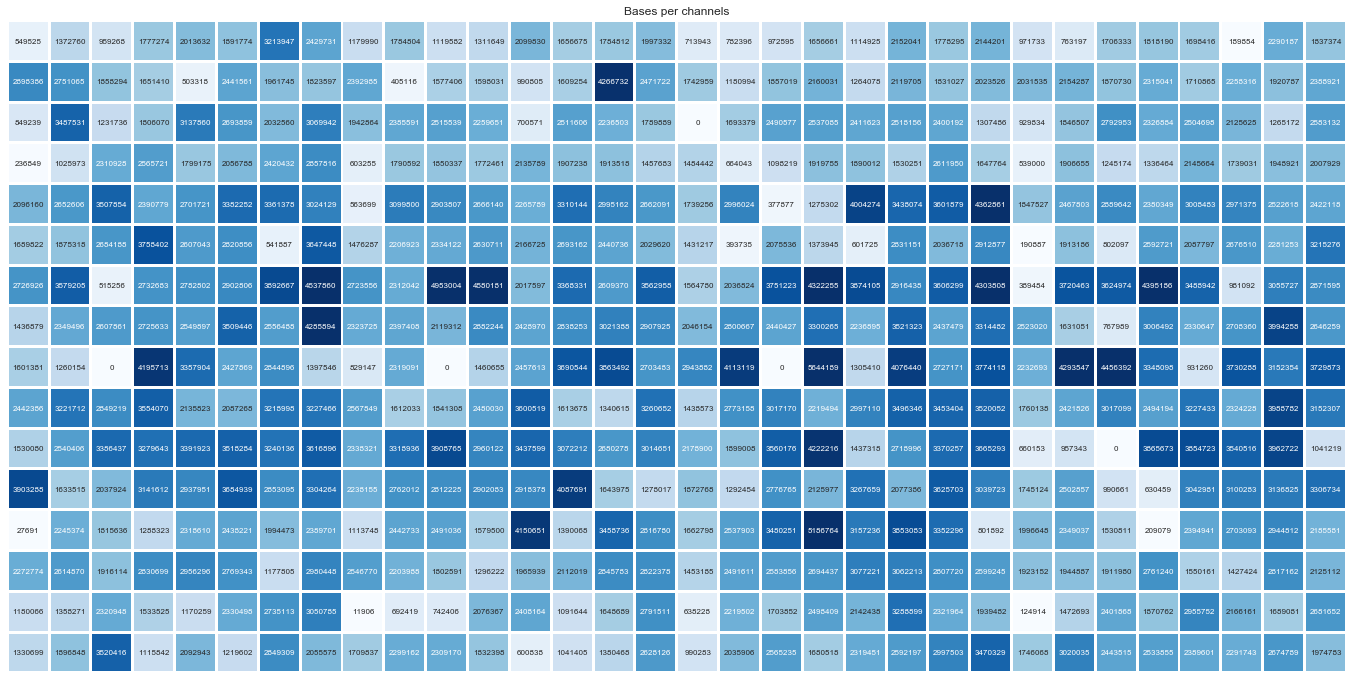

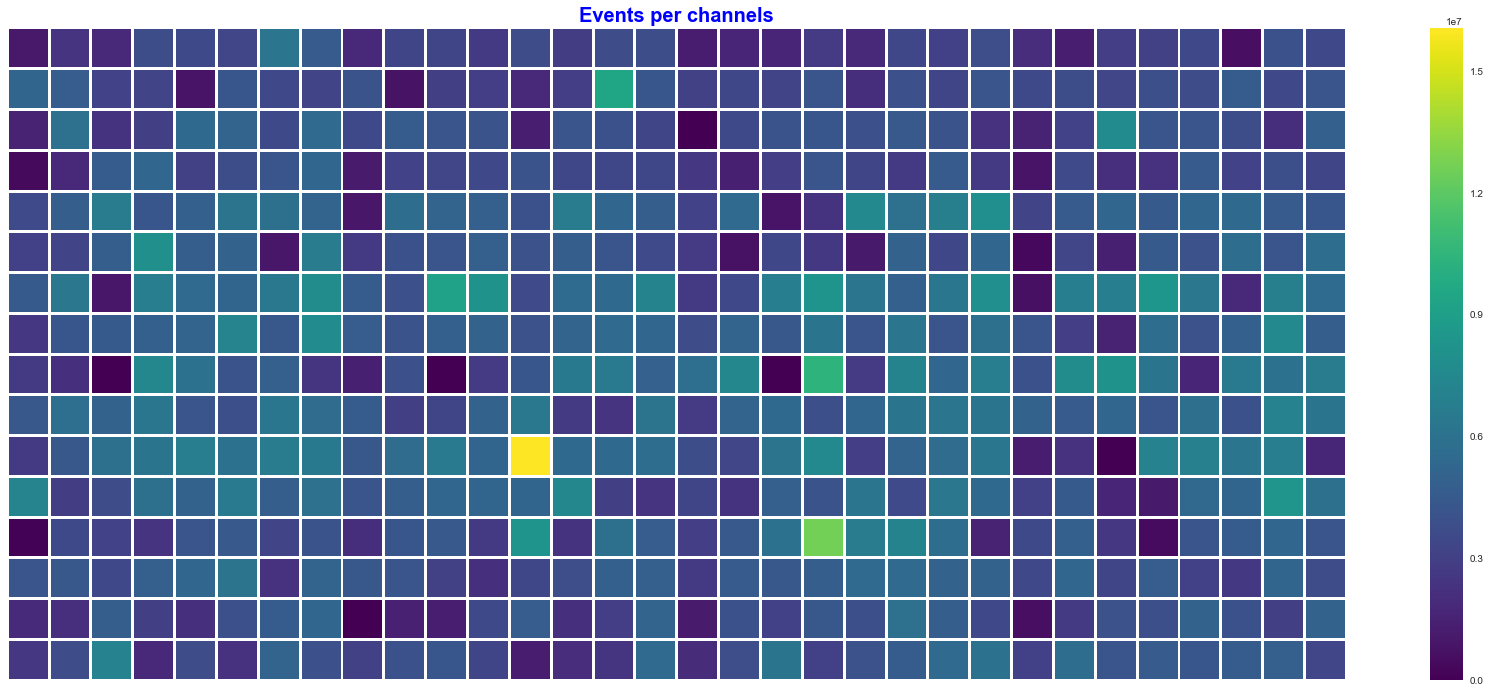

In [16]:
g = p.channels_activity(level='reads')
g = p.channels_activity(level='bases', cmap="Blues")
g = p.channels_activity(level='events', cmap="viridis", cbar=True, annot=False, figsize=[30,12], robust=False)

# Changing properties of the axis title
g.title.set_fontsize(20)
g.title.set_color("blue")
g.title.set_fontweight("bold")

## mean_qual_distribution

In [17]:
help(pycoQC.reads_qual_distribution, full=True)

Plot the distribution of mean read quality

* figsize

Size of ploting area [Default [30,7]]

* hist

If True plot an histogram of distribution [Default True]

* kde

If True plot a univariate kernel density estimate [Default True]

* kde_color / hist_color

Color map or color codes to use for the 3 plots [Default "black" "orangered"]

* kde_alpha / hist_alpha

Opacity of the area from 0 to 1 for the 3 plots [Default 0.5 0.5]

* win_size

Size of the bins in quality score ranging from 0 to 40 for the histogram [Default 0.1]

* sample

If given, a n number of reads will be randomly selected instead of the entire dataframe [Default 100000]

* xmin, xmax, ymin, ymax

Lower and upper limits on x/y axis [Default None]

* min_qual, max_qual

Minimal and maximal read quality cut-offs for the plot [Default None]

* min_freq, max_freq

Minimal and maximal read frequency cut-offs for the plot [Default None]

=> Return

A matplotlib.axes object for further user customisation (http://matplotlib.org/api/axes_api.html)

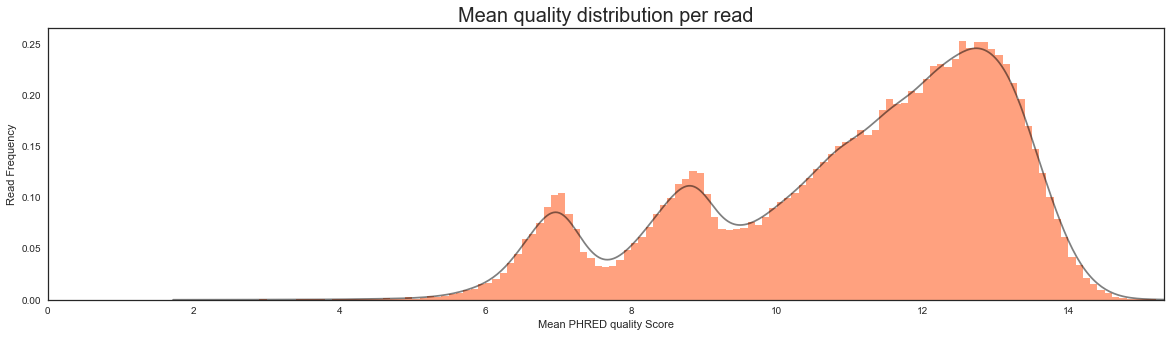

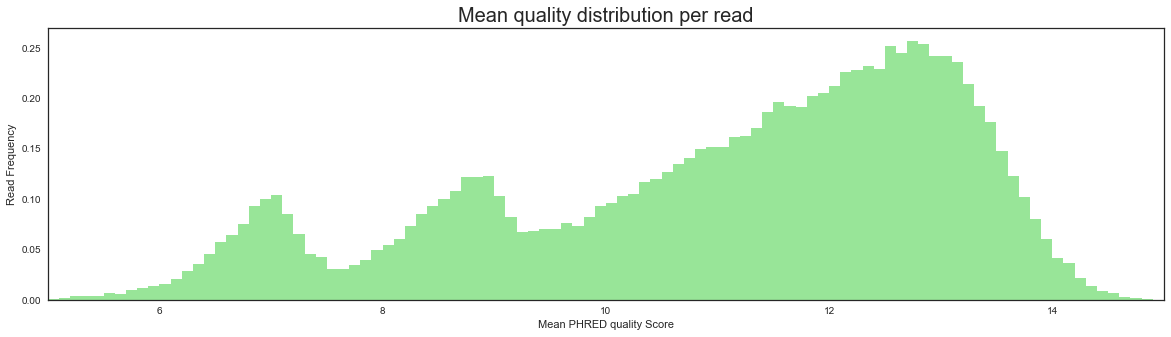

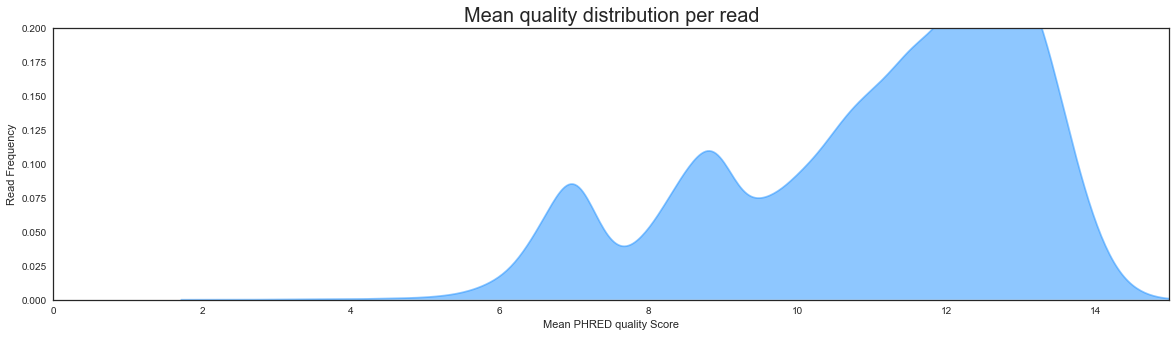

In [18]:
# Default option = histogram + kde
g = p.reads_qual_distribution(figsize=[20, 5])
g.title.set_fontsize(20)

# histogram only
g = p.reads_qual_distribution(figsize=[20, 5], kde=False, hist_color="limegreen", max_qual=15, min_qual=5)
g.title.set_fontsize(20)

# kde only
g = p.reads_qual_distribution(figsize=[20, 5], hist=False, kde_color="dodgerblue", max_qual=15, max_freq=0.2)
g.title.set_fontsize(20)

## output_over_time

In [19]:
help(pycoQC.output_over_time, full=True)

Plot the output over the time of the experiment at read, base or event level

* level

Aggregate channel output results by "reads", "bases" or "events" [Default "reads"]

* figsize

Size of ploting area [Default [30,7]

* color

Color of the plot. Valid matplotlib color code [Default "orangered"]

* alpha

Opacity of the area from 0 to 1 [Default 0.5]

* win_size

Size of the bins in hours [Default 0.25]

* cumulative

cumulative histogram [Default False]

=> Return

A matplotlib.axes object for further user customisation (http://matplotlib.org/api/axes_api.html)

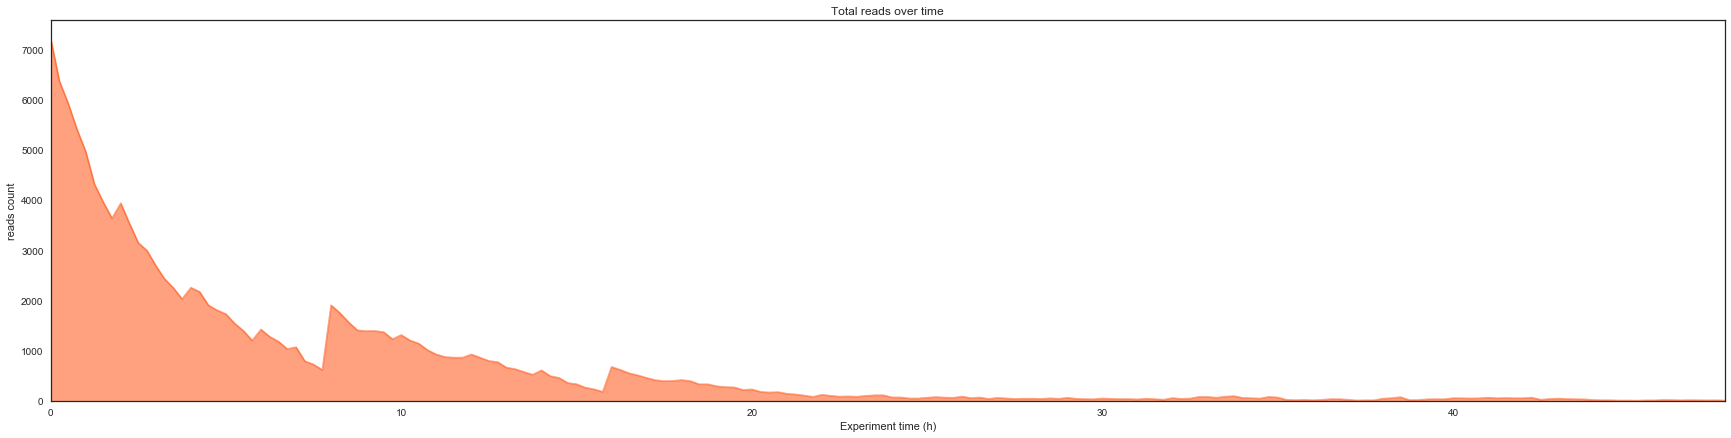

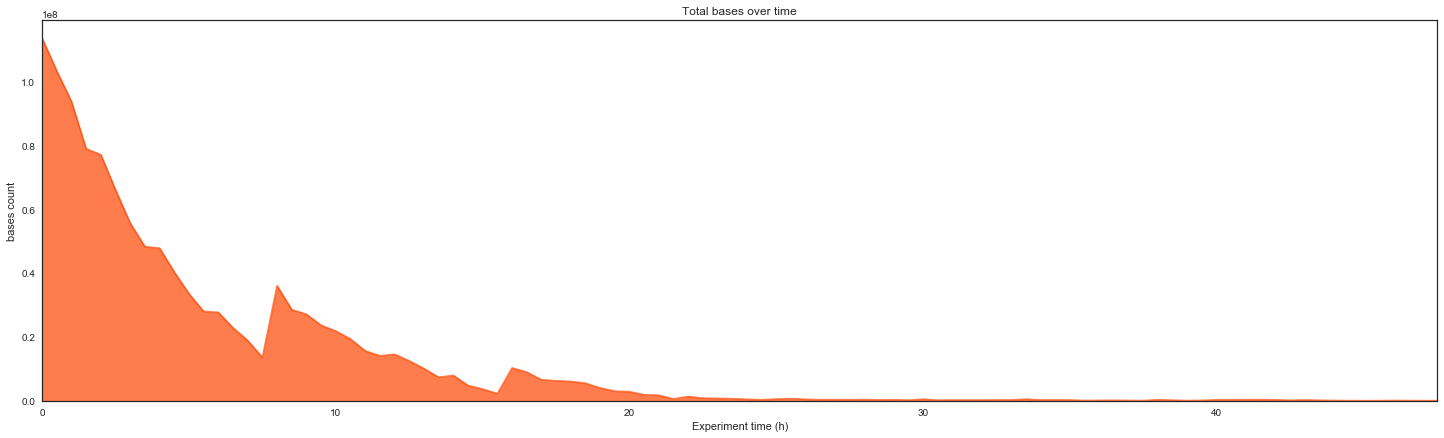

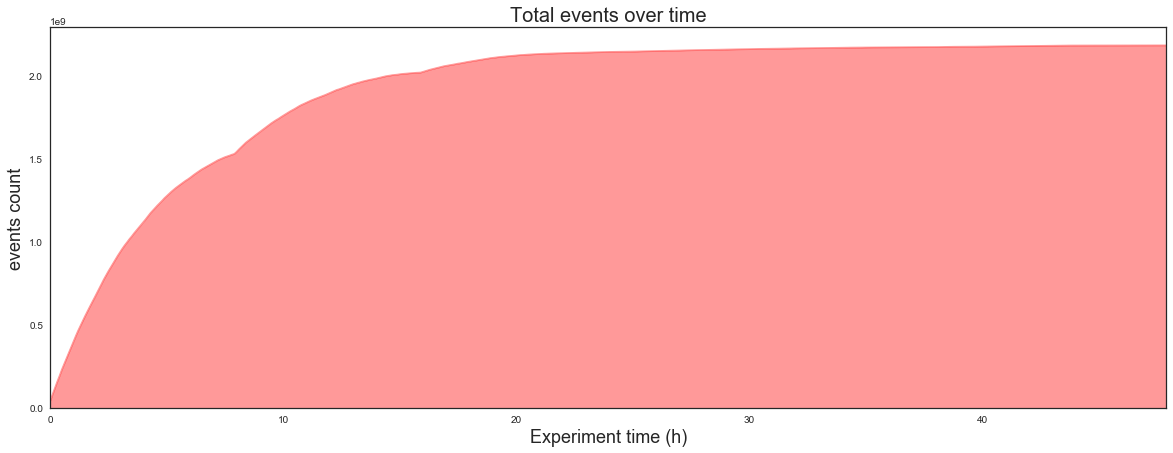

In [20]:
g = p.output_over_time(level='reads')
g = p.output_over_time(level='bases', figsize=[25, 7], color='orangered', alpha=0.7, win_size=0.5, cumulative=False)
g = p.output_over_time(level='events', figsize=[20, 7], color='red', alpha=0.4, win_size=0.1, cumulative=True)

# Changing size of the axis title and labels
g.title.set_fontsize(20)
g.xaxis.label.set_fontsize(18)
g.yaxis.label.set_fontsize(18)

## quality_over_time

In [21]:
help(pycoQC.quality_over_time, full=True)

Plot the evolution of the mean read quality over the time of the experiment at read, base or event level

* figsize

Size of ploting area [Default [30,7]

* color

Color of the plot. Valid matplotlib color code [Default "orangered"]

* alpha

Opacity of the area from 0 to 1 [Default 0.25]

* win_size

Size of the bins in hours [Default 0.25]

=> Return

A matplotlib.axes object for further user customisation (http://matplotlib.org/api/axes_api.html)

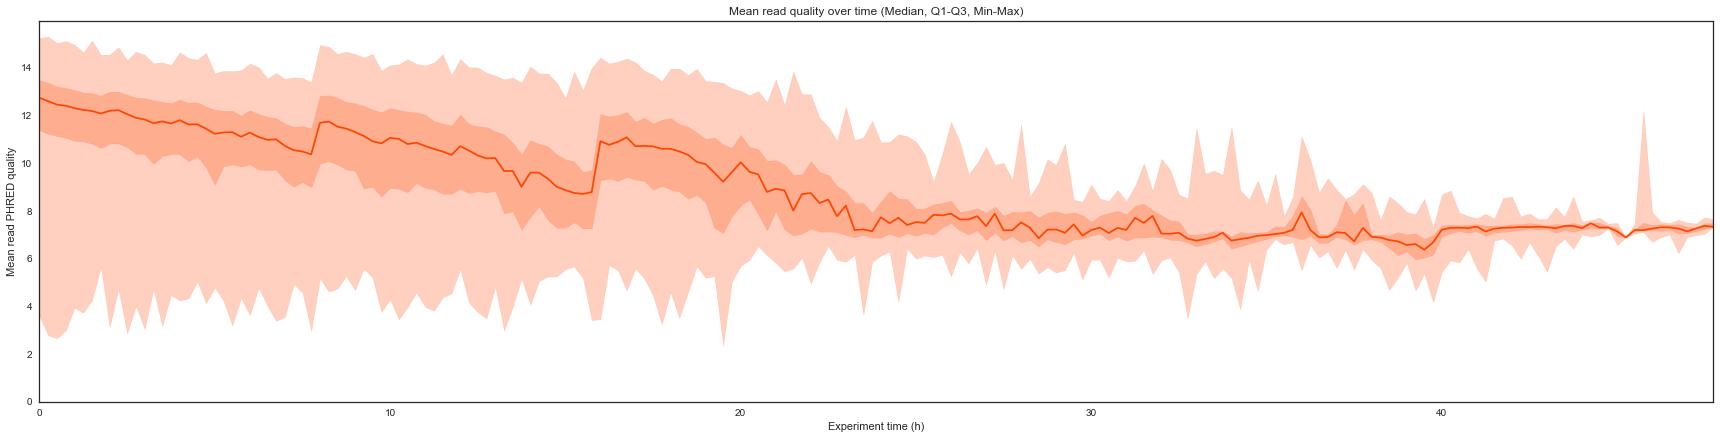

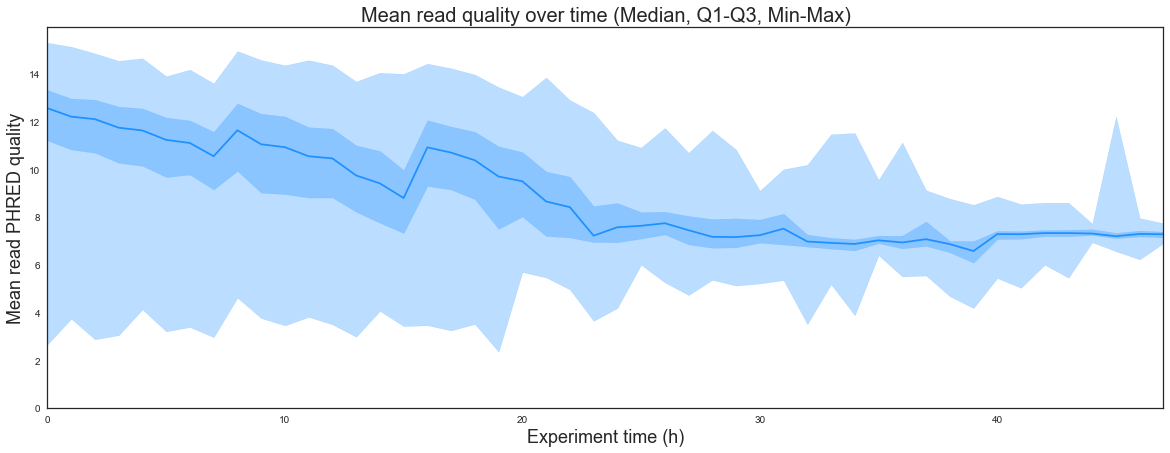

In [22]:
g = p.quality_over_time()
g = p.quality_over_time(figsize=[20,7], color='dodgerblue', alpha=0.3, win_size=1)

# Changing size of the axis title and labels
g.title.set_fontsize(20)
g.xaxis.label.set_fontsize(18)
g.yaxis.label.set_fontsize(18)

## reads_len_distribution

In [23]:
help(pycoQC.reads_len_distribution, full=True)

Plot the distribution of read length in base pairs

* figsize

Size of ploting area [Default [30,7]]

* hist

If True plot an histogram of distribution [Default True]

* kde

If True plot a univariate kernel density estimate [Default True]

* kde_color / hist_color

Color map or color codes to use for the 3 plots [Default "black" "orangered"]

* kde_alpha / hist_alpha

Opacity of the area from 0 to 1 for the 3 plots [Default 0.5 0.5]

* win_size

Size of the bins in base pairs for the histogram [Default 250]

* sample

If given, a n number of reads will be randomly selected instead of the entire dataframe [Default 100000]

* min_len, max_len

Minimal and maximal read length cut-offs for the plot [Default None]

* min_freq, max_freq

Minimal and maximal read frequency cut-offs for the plot [Default None]

=> Return

A matplotlib.axes object for further user customisation (http://matplotlib.org/api/axes_api.html)

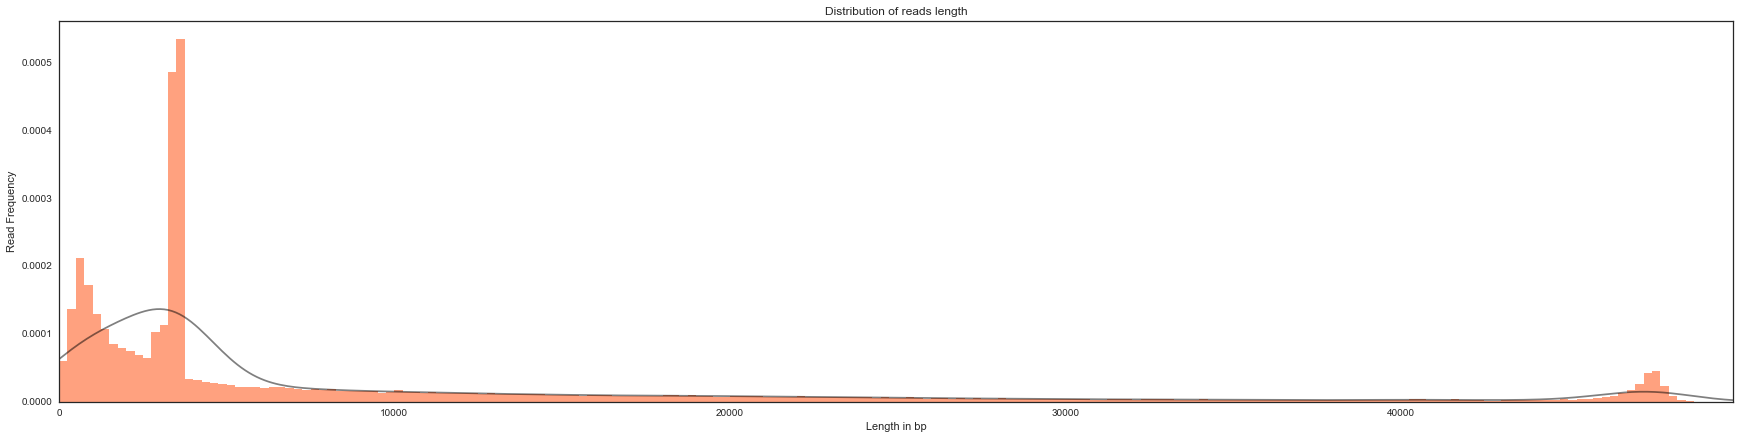

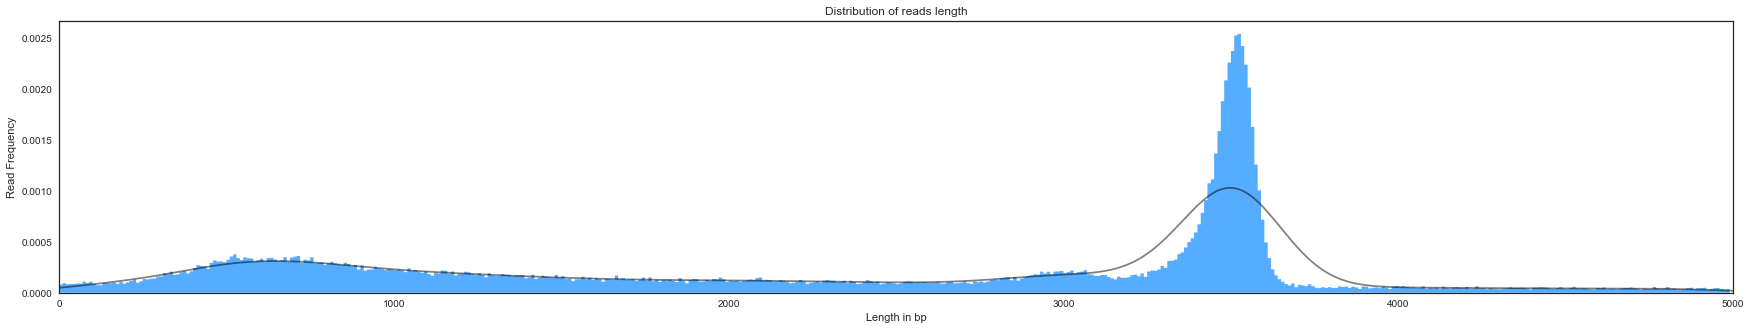

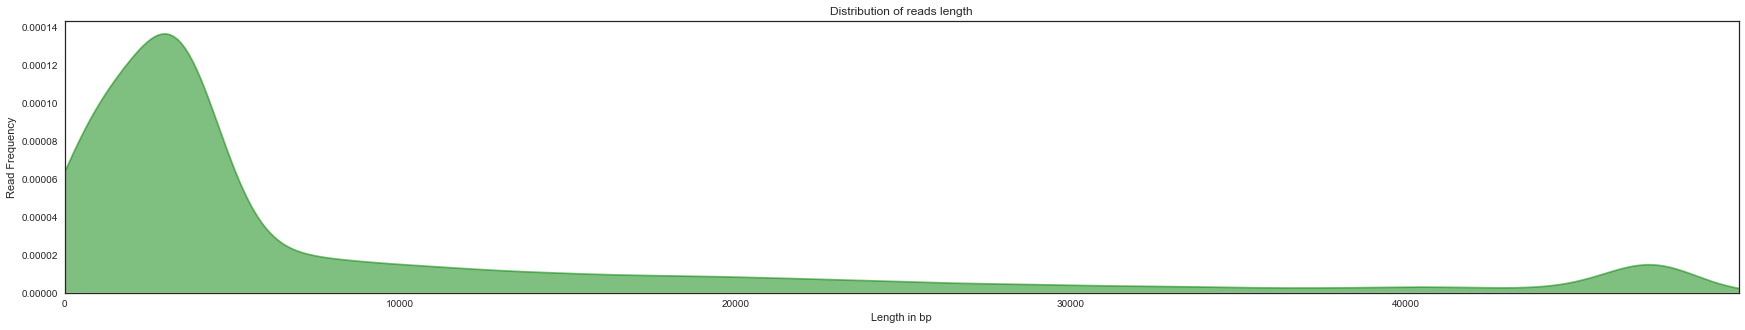

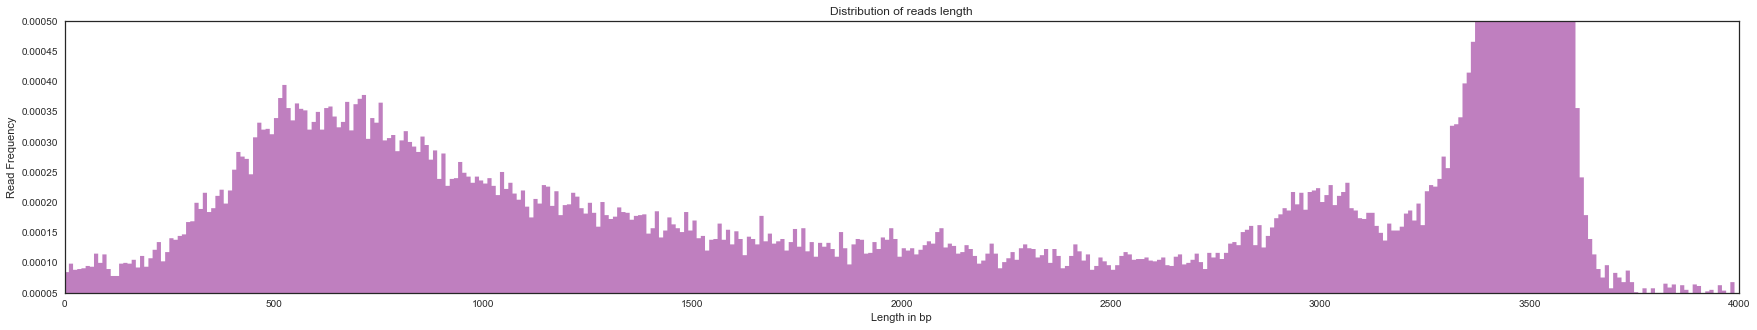

In [24]:
g = p.reads_len_distribution()
g = p.reads_len_distribution(figsize=[30, 5], hist=True, kde=True, hist_color='dodgerblue', hist_alpha=0.75, max_len=5000, win_size=10)
g = p.reads_len_distribution(figsize=[30, 5], hist=False, kde=True, kde_color='green', kde_alpha=0.5)
g = p.reads_len_distribution(figsize=[30, 5], hist=True, kde=False, hist_color='purple', win_size=10, min_freq=0.00005, max_freq=0.0005, max_len=4000)

## reads_len_quality

In [25]:
help(pycoQC.reads_len_quality, full=True)

Draw a bivariate plot of read length vs mean read quality with marginal univariate plots.

* figsize

Size of square ploting area [Default 12]

* kde

If True plot a bivariate kernel density estimate [Default True]

* scatter

If True plot a scatter plot  [Default true]

* margin_plot

If True plot marginal univariate distributions [Default True]

* kde_cmap / scatter_color / margin_plot_color

Color map or color codes to use for the 3 plots [Default "copper", "orangered", "orangered"]

* kde_alpha / scatter_alpha / margin_plot_alpha

Opacity of the area from 0 to 1 for the 3 plots [Default 1, 0.01, 0.5]

* sample

If given, a n number of reads will be randomly selected instead of the entire dataframe [Default 100000]

* kde_levels

Number of levels for the central density plot [Default 10]

* kde_shade

If True the density curves will be filled [Default False]

* min_len, max_len

Minimal and maximal read length cut-offs for the plot [Default None]

* min_qual, max_qual

Minimal and maximal read quality cut-offs for the plot [Default None]

=> Return

A seaborn JointGrid object with the plot on it. (http://seaborn.pydata.org/generated/seaborn.JointGrid.html)

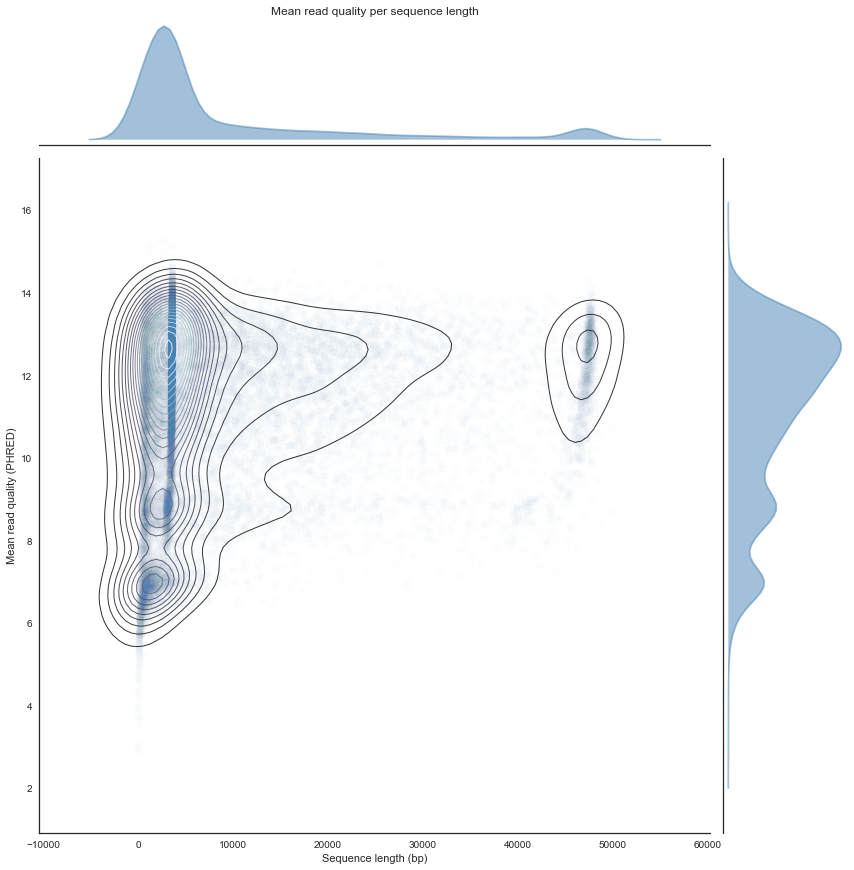

In [26]:
p.reads_len_quality(kde=True, kde_cmap="bone", kde_alpha=0.8, kde_levels=25, scatter=True, scatter_color='steelblue', margin_plot=True, margin_plot_color='steelblue', sample = 20000)

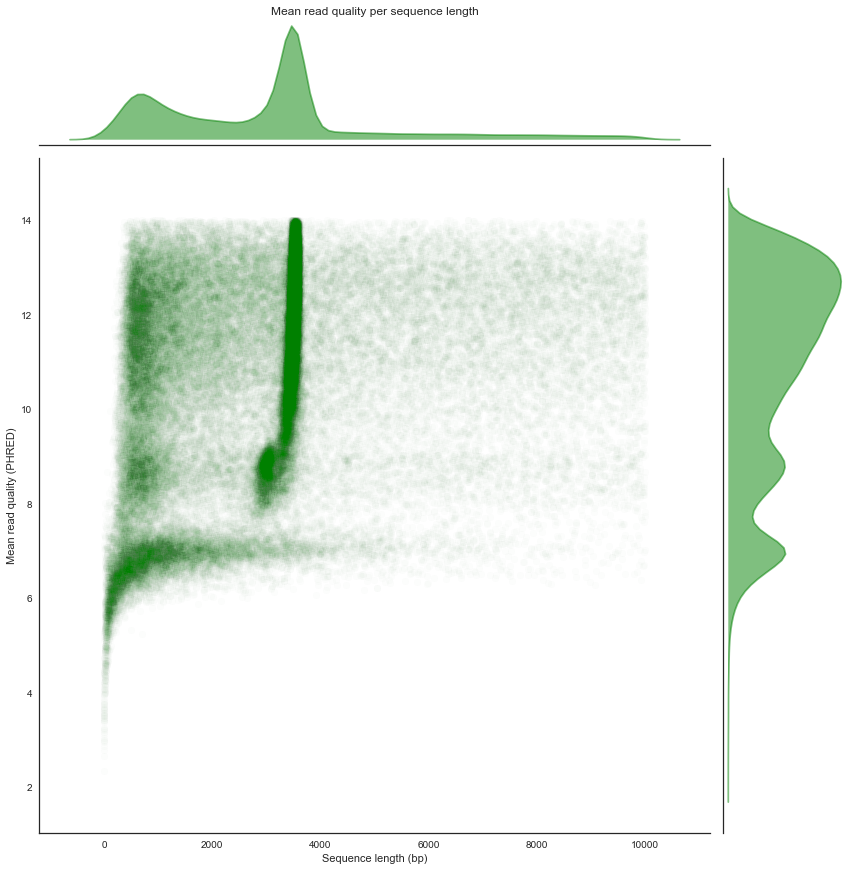

In [27]:
p.reads_len_quality(scatter=True, kde=False, scatter_alpha=0.01, scatter_color="green", margin_plot=True, margin_plot_color='green', margin_plot_alpha=0.5, min_len=0, max_len=10000, min_qual=2, max_qual=14)

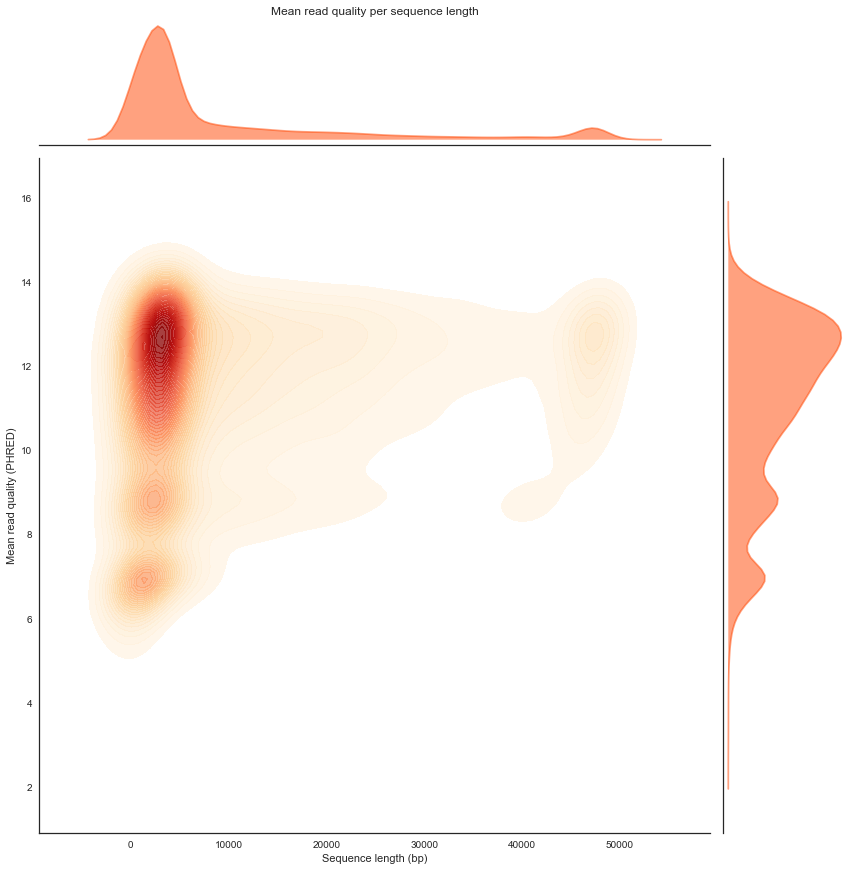

In [28]:
g = p.reads_len_quality(kde=True, kde_cmap='OrRd', kde_alpha=0.75, kde_levels=50, kde_shade=True, scatter=False, sample = 50000)